In [29]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io

df = pd.read_csv('Manaus.csv', sep=';', encoding='latin-1')

#Limpeza
cleaned_data = df[['_idade','_sexo','_bairro','_classificacao','_conclusao','_dt_notificacao','_teste_pcr','_teste_anticorpo','_teste_antigeno','_teste_igm','_teste_igg','_faixa etária']]
cleaned_data = cleaned_data.dropna()
cleaned_data = cleaned_data.reset_index(drop=True)
df = cleaned_data

c:\users\luiz fabio\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (15,21,23,29,30,31,32,34) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [30]:
df.head()

,_idade,_sexo,_bairro,_classificacao,_conclusao,_dt_notificacao,_teste_pcr,_teste_anticorpo,_teste_antigeno,_teste_igm,_teste_igg,_faixa etária
0,43.0,F,SANTA ETELVINA,Em análise,Recuperado,08/04/2020,0.0,0.0,0.0,0.0,0.0,40a - 49a
1,39.0,M,CRESPO,Em análise,Recuperado,31/03/2020,0.0,0.0,0.0,0.0,0.0,30a - 39a
2,42.0,F,JAPIIM 1,Em análise,Recuperado,07/04/2020,0.0,0.0,0.0,0.0,0.0,40a - 49a
3,35.0,F,JORGE TEIXEIRA,Em análise,Recuperado,04/05/2020,0.0,0.0,0.0,0.0,0.0,30a - 39a
4,45.0,F,COROADO,Em análise,Recuperado,04/05/2020,0.0,0.0,0.0,0.0,0.0,40a - 49a


In [31]:
teste = df.loc[df['_classificacao'] == 'Confirmado']
teste.columns

Index(['_idade', '_sexo', '_bairro', '_classificacao', '_conclusao',
       '_dt_notificacao', '_teste_pcr', '_teste_anticorpo', '_teste_antigeno',
       '_teste_igm', '_teste_igg', '_faixa etária'],
      dtype='object')

In [32]:
#Todos os casos por faixa etaria
faixas_etarias = teste['_faixa etária'].value_counts()
faixas_etarias

40a - 49a    2425
30a - 39a    2104
50a - 59a    1457
20a - 29a    1139
60a - 69a     649
70a - 79a     283
80a ou +      171
15a - 19a     128
 1a - 4a       69
10a - 14a      67
 < 1a          67
 5a - 9a       55
Name: _faixa etária, dtype: int64

In [33]:
list_of_tuples = list(zip(faixas_etarias.index, faixas_etarias.values))  

faixas_etarias = pd.DataFrame(list_of_tuples, columns = ['Faixa de Idade', 'Casos'])

display(faixas_etarias)

,Faixa de Idade,Casos
0,40a - 49a,2425
1,30a - 39a,2104
2,50a - 59a,1457
3,20a - 29a,1139
4,60a - 69a,649
5,70a - 79a,283
6,80a ou +,171
7,15a - 19a,128
8,1a - 4a,69
9,10a - 14a,67


In [34]:
soma_de_casos = faixas_etarias['Casos'].sum()

for i in range(faixas_etarias['Casos'].size):
    porcentagem = (faixas_etarias['Casos'][i]/soma_de_casos)*100
    
    faixas_etarias['Casos'][i] = porcentagem

display(faixas_etarias)

<ipython-input-34-88f382850747>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  faixas_etarias['Casos'][i] = porcentagem


,Faixa de Idade,Casos
0,40a - 49a,28
1,30a - 39a,24
2,50a - 59a,16
3,20a - 29a,13
4,60a - 69a,7
5,70a - 79a,3
6,80a ou +,1
7,15a - 19a,1
8,1a - 4a,0
9,10a - 14a,0


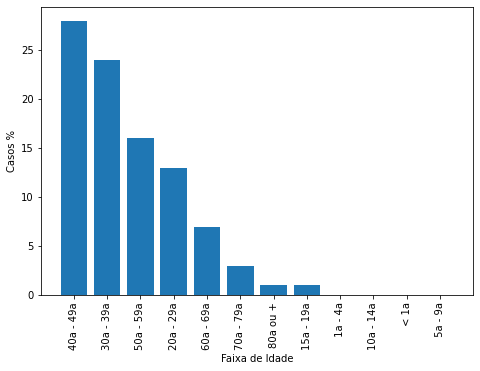

In [35]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(faixas_etarias['Faixa de Idade'], faixas_etarias['Casos'])
plt.xticks(faixas_etarias['Faixa de Idade'],rotation=90)
ax.set_xlabel('Faixa de Idade')
ax.set_ylabel('Casos %')

plt.show()

In [36]:
display(faixas_etarias)

,Faixa de Idade,Casos
0,40a - 49a,28
1,30a - 39a,24
2,50a - 59a,16
3,20a - 29a,13
4,60a - 69a,7
5,70a - 79a,3
6,80a ou +,1
7,15a - 19a,1
8,1a - 4a,0
9,10a - 14a,0
